### Time-Series Forecasting Of Covid-19 Cases In RUSSIA (LSTM)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('RUSSIA.csv')

In [27]:
df.head()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
0,01-02-2020,2,2,0,0
1,02-02-2020,2,0,0,0
2,03-02-2020,2,0,0,0
3,04-02-2020,2,0,0,0
4,05-02-2020,2,0,0,0


In [28]:
df.tail()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
187,06-08-2020,871894,4551,14606,74
188,07-08-2020,877135,5241,14725,119
189,08-08-2020,882347,5212,14854,129
190,09-08-2020,887536,5189,14931,77
191,10-08-2020,892654,5118,15001,70


In [29]:
df1=df.reset_index()['Total']

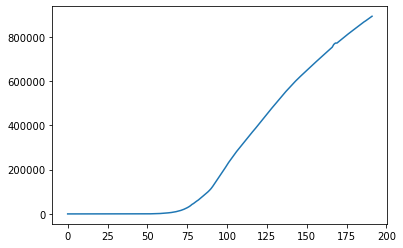

In [30]:
plt.plot(df1)

In [31]:
df1

0           2
1           2
2           2
3           2
4           2
        ...  
187    871894
188    877135
189    882347
190    887536
191    892654
Name: Total, Length: 192, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.12025739e-06]
 [2.24051478e-06]
 [2.24051478e-06]
 [2.24051478e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [2.57659200e-05]
 [3.13672069e-05]
 [4.81710678e-05]
 [6.38546712e-05]
 [6.83357008e-05]
 [1.01943423e-04]
 [1.25468828e-04]
 [1.62437322e-04]
 [2.20690706e-04]
 [2.81184605e-04]
 [3.40558247e-04]
 [4.88432222e-04]
 [4.88432222e-04]
 [5.52286893e-04]
 [7.34888848e-04]
 [9.38775693e-04]
 [1.158346

In [34]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [35]:
training_size,test_size

(134, 58)

In [38]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.12025739e-06],
       [2.24051478e-06],
       [2.24051478e-06],
       [2.24051478e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [2.57659200e-05],


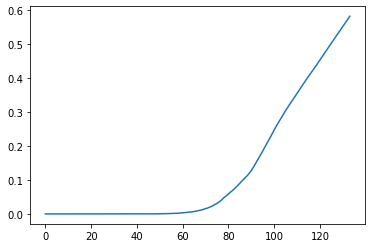

In [39]:
plt.plot(train_data)

In [40]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(83, 50)
(83,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(7, 50)
(7,)


(None, None)

In [44]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization


In [46]:
model=Sequential()
model.add(LSTM(128,input_shape=(50, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [72]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
83/83 [==============================] - 1s 7ms/step - loss: 1.3213e-06 - val_loss: 2.9978e-05
Epoch 2/100
83/83 [==============================] - 1s 7ms/step - loss: 7.9208e-07 - val_loss: 1.4324e-05
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 1.3617e-06 - val_loss: 7.5921e-05
Epoch 4/100
83/83 [==============================] - 1s 6ms/step - loss: 1.0590e-06 - val_loss: 2.1918e-05
Epoch 5/100
83/83 [==============================] - 1s 6ms/step - loss: 1.5496e-06 - val_loss: 7.0721e-05
Epoch 6/100
83/83 [==============================] - 1s 7ms/step - loss: 5.0766e-06 - val_loss: 2.8417e-04
Epoch 7/100
83/83 [==============================] - 1s 7ms/step - loss: 1.8087e-05 - val_loss: 2.7406e-05
Epoch 8/100
83/83 [==============================] - 1s 7ms/step - loss: 2.2925e-06 - val_loss: 2.7361e-05
Epoch 9/100
83/83 [==============================] - 1s 7ms/step - loss: 3.0018e-06 - val_loss: 3.1704e-05
Epoch 10/100
83/83 [=================

Epoch 77/100
83/83 [==============================] - 1s 9ms/step - loss: 1.1954e-06 - val_loss: 1.8216e-05
Epoch 78/100
83/83 [==============================] - 1s 8ms/step - loss: 1.0308e-06 - val_loss: 1.2000e-05
Epoch 79/100
83/83 [==============================] - 1s 8ms/step - loss: 1.6634e-06 - val_loss: 7.3350e-06
Epoch 80/100
83/83 [==============================] - 1s 8ms/step - loss: 1.0765e-05 - val_loss: 1.1393e-05
Epoch 81/100
83/83 [==============================] - 1s 8ms/step - loss: 1.7685e-06 - val_loss: 6.8925e-05
Epoch 82/100
83/83 [==============================] - 1s 9ms/step - loss: 8.1797e-07 - val_loss: 3.0323e-05
Epoch 83/100
83/83 [==============================] - 1s 8ms/step - loss: 1.7631e-06 - val_loss: 5.4213e-06
Epoch 84/100
83/83 [==============================] - 1s 8ms/step - loss: 2.4548e-06 - val_loss: 3.2426e-07
Epoch 85/100
83/83 [==============================] - 1s 8ms/step - loss: 1.3448e-06 - val_loss: 1.2634e-05
Epoch 86/100
83/83 [========

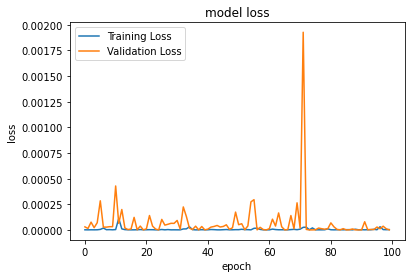

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [74]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [75]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0019865886659520067

Validation RMSE

In [76]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.0010041574357131722

Training MEA

In [77]:
mean_absolute_error(y_train,train_predict)

0.0016563531437192988

Validation MEA

In [78]:
mean_absolute_error(ytest,test_predict)

0.0008901419269222721

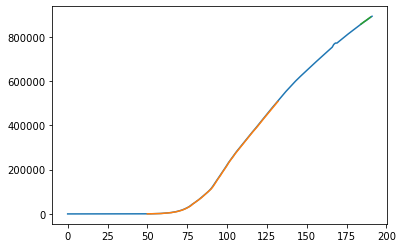

In [79]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [80]:
len(test_data)

58

In [81]:
x_input=test_data[8:].reshape(1,-1)
x_input.shape


(1, 50)

In [82]:
x_input

array([[0.66350381, 0.67182172, 0.67986068, 0.68782908, 0.69544683,
        0.70312283, 0.7107305 , 0.71825751, 0.72575539, 0.7330998 ,
        0.74067274, 0.74819863, 0.75562817, 0.76317423, 0.77058025,
        0.77771405, 0.78506518, 0.79235693, 0.79978984, 0.80719586,
        0.81460636, 0.82192949, 0.82892885, 0.83612315, 0.84332416,
        0.85748422, 0.86432787, 0.86432787, 0.8709822 , 0.87752674,
        0.88409369, 0.89064495, 0.89715477, 0.9037318 , 0.91019009,
        0.91650274, 0.92254652, 0.92867993, 0.93485143, 0.94099268,
        0.94711153, 0.95319117, 0.95923383, 0.96501324, 0.97164517,
        0.97674346, 0.98261473, 0.98845351, 0.99426652, 1.        ]])

In [83]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [84]:
temp_input

[0.6635038066346124,
 0.6718217177578721,
 0.6798606847909376,
 0.6878290756084118,
 0.6954468258627102,
 0.7031228295013062,
 0.7107304974390917,
 0.7182575068447727,
 0.725755389558305,
 0.7330997970093609,
 0.7406727369680458,
 0.7481986261163366,
 0.7556281731290582,
 0.763174226910375,
 0.7705802485178995,
 0.777714047579572,
 0.7850651765749699,
 0.79235693192868,
 0.7997898397135726,
 0.8071958613210972,
 0.8146063639581831,
 0.8219294865188226,
 0.8289288546936545,
 0.8361231476544051,
 0.8433241621594978,
 0.8574842155733702,
 0.8643278679709451,
 0.8643278679709451,
 0.8709821968695528,
 0.8775267405439074,
 0.8840936893660688,
 0.8906449545847654,
 0.8971547702800196,
 0.903731801418694,
 0.9101900852739926,
 0.9165027356685472,
 0.9225465242894207,
 0.9286799335015213,
 0.9348514314648935,
 0.9409926824787264,
 0.9471115283447525,
 0.9531911652021169,
 0.9592338335656001,
 0.9650132414423539,
 0.9716451651931548,
 0.9767434565765831,
 0.9826147255593446,
 0.9884535070777862

In [85]:
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<180):
    
    if(len(temp_input)>50):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0068992]
51
1 day input [0.67182172 0.67986068 0.68782908 0.69544683 0.70312283 0.7107305
 0.71825751 0.72575539 0.7330998  0.74067274 0.74819863 0.75562817
 0.76317423 0.77058025 0.77771405 0.78506518 0.79235693 0.79978984
 0.80719586 0.81460636 0.82192949 0.82892885 0.83612315 0.84332416
 0.85748422 0.86432787 0.86432787 0.8709822  0.87752674 0.88409369
 0.89064495 0.89715477 0.9037318  0.91019009 0.91650274 0.92254652
 0.92867993 0.93485143 0.94099268 0.94711153 0.95319117 0.95923383
 0.96501324 0.97164517 0.97674346 0.98261473 0.98845351 0.99426652
 1.         1.00689924]
1 day output [[1.0140024]]
2 day input [0.67986068 0.68782908 0.69544683 0.70312283 0.7107305  0.71825751
 0.72575539 0.7330998  0.74067274 0.74819863 0.75562817 0.76317423
 0.77058025 0.77771405 0.78506518 0.79235693 0.79978984 0.80719586
 0.81460636 0.82192949 0.82892885 0.83612315 0.84332416 0.85748422
 0.86432787 0.86432787 0.8709822  0.87752674 0.88409369 0.89064495
 0.89715477 0.9037318  0.91019009 0.9165

14 day output [[1.1075389]]
15 day input [0.77771405 0.78506518 0.79235693 0.79978984 0.80719586 0.81460636
 0.82192949 0.82892885 0.83612315 0.84332416 0.85748422 0.86432787
 0.86432787 0.8709822  0.87752674 0.88409369 0.89064495 0.89715477
 0.9037318  0.91019009 0.91650274 0.92254652 0.92867993 0.93485143
 0.94099268 0.94711153 0.95319117 0.95923383 0.96501324 0.97164517
 0.97674346 0.98261473 0.98845351 0.99426652 1.         1.00689924
 1.01400244 1.02124035 1.02845132 1.03562427 1.04277778 1.04992759
 1.05708253 1.06424713 1.07142365 1.07861388 1.08581924 1.09304118
 1.10028076 1.10753894]
15 day output [[1.114816]]
16 day input [0.78506518 0.79235693 0.79978984 0.80719586 0.81460636 0.82192949
 0.82892885 0.83612315 0.84332416 0.85748422 0.86432787 0.86432787
 0.8709822  0.87752674 0.88409369 0.89064495 0.89715477 0.9037318
 0.91019009 0.91650274 0.92254652 0.92867993 0.93485143 0.94099268
 0.94711153 0.95319117 0.95923383 0.96501324 0.97164517 0.97674346
 0.98261473 0.98845351 0.

32 day output [[1.2409397]]
33 day input [0.9037318  0.91019009 0.91650274 0.92254652 0.92867993 0.93485143
 0.94099268 0.94711153 0.95319117 0.95923383 0.96501324 0.97164517
 0.97674346 0.98261473 0.98845351 0.99426652 1.         1.00689924
 1.01400244 1.02124035 1.02845132 1.03562427 1.04277778 1.04992759
 1.05708253 1.06424713 1.07142365 1.07861388 1.08581924 1.09304118
 1.10028076 1.10753894 1.11481595 1.12211192 1.1294266  1.13675964
 1.14411044 1.15147853 1.15886319 1.16626358 1.17367887 1.18110824
 1.18855071 1.19600546 1.20347178 1.21094847 1.21843469 1.22592938
 1.23343134 1.24093974]
33 day output [[1.2484533]]
34 day input [0.91019009 0.91650274 0.92254652 0.92867993 0.93485143 0.94099268
 0.94711153 0.95319117 0.95923383 0.96501324 0.97164517 0.97674346
 0.98261473 0.98845351 0.99426652 1.         1.00689924 1.01400244
 1.02124035 1.02845132 1.03562427 1.04277778 1.04992759 1.05708253
 1.06424713 1.07142365 1.07861388 1.08581924 1.09304118 1.10028076
 1.10753894 1.11481595 

48 day output [[1.3609585]]
49 day input [1.         1.00689924 1.01400244 1.02124035 1.02845132 1.03562427
 1.04277778 1.04992759 1.05708253 1.06424713 1.07142365 1.07861388
 1.08581924 1.09304118 1.10028076 1.10753894 1.11481595 1.12211192
 1.1294266  1.13675964 1.14411044 1.15147853 1.15886319 1.16626358
 1.17367887 1.18110824 1.18855071 1.19600546 1.20347178 1.21094847
 1.21843469 1.22592938 1.23343134 1.24093974 1.24845326 1.25597095
 1.26349187 1.27101445 1.27853775 1.28606021 1.29358089 1.30109835
 1.30861127 1.31611824 1.32361794 1.33110905 1.33859003 1.34605956
 1.35351622 1.36095846]
49 day output [[1.3683847]]
50 day input [1.00689924 1.01400244 1.02124035 1.02845132 1.03562427 1.04277778
 1.04992759 1.05708253 1.06424713 1.07142365 1.07861388 1.08581924
 1.09304118 1.10028076 1.10753894 1.11481595 1.12211192 1.1294266
 1.13675964 1.14411044 1.15147853 1.15886319 1.16626358 1.17367887
 1.18110824 1.18855071 1.19600546 1.20347178 1.21094847 1.21843469
 1.22592938 1.23343134 1

64 day output [[1.4768265]]
65 day input [1.11481595 1.12211192 1.1294266  1.13675964 1.14411044 1.15147853
 1.15886319 1.16626358 1.17367887 1.18110824 1.18855071 1.19600546
 1.20347178 1.21094847 1.21843469 1.22592938 1.23343134 1.24093974
 1.24845326 1.25597095 1.26349187 1.27101445 1.27853775 1.28606021
 1.29358089 1.30109835 1.30861127 1.31611824 1.32361794 1.33110905
 1.33859003 1.34605956 1.35351622 1.36095846 1.36838472 1.37579358
 1.3831836  1.39055288 1.39790022 1.40522397 1.41252267 1.41979492
 1.42703879 1.4342531  1.44143593 1.44858599 1.45570159 1.46278119
 1.46982336 1.47682655]
65 day output [[1.4837891]]
66 day input [1.12211192 1.1294266  1.13675964 1.14411044 1.15147853 1.15886319
 1.16626358 1.17367887 1.18110824 1.18855071 1.19600546 1.20347178
 1.21094847 1.21843469 1.22592938 1.23343134 1.24093974 1.24845326
 1.25597095 1.26349187 1.27101445 1.27853775 1.28606021 1.29358089
 1.30109835 1.30861127 1.31611824 1.32361794 1.33110905 1.33859003
 1.34605956 1.35351622 

81 day output [[1.5885427]]
82 day input [1.24093974 1.24845326 1.25597095 1.26349187 1.27101445 1.27853775
 1.28606021 1.29358089 1.30109835 1.30861127 1.31611824 1.32361794
 1.33110905 1.33859003 1.34605956 1.35351622 1.36095846 1.36838472
 1.37579358 1.3831836  1.39055288 1.39790022 1.40522397 1.41252267
 1.41979492 1.42703879 1.4342531  1.44143593 1.44858599 1.45570159
 1.46278119 1.46982336 1.47682655 1.48378909 1.49070978 1.49758708
 1.50441945 1.51120555 1.51794374 1.52463293 1.5312717  1.53785849
 1.54439223 1.55087173 1.55729568 1.56366289 1.5699724  1.57622278
 1.5824132  1.5885427 ]
82 day output [[1.5946102]]
83 day input [1.24845326 1.25597095 1.26349187 1.27101445 1.27853775 1.28606021
 1.29358089 1.30109835 1.30861127 1.31611824 1.32361794 1.33110905
 1.33859003 1.34605956 1.35351622 1.36095846 1.36838472 1.37579358
 1.3831836  1.39055288 1.39790022 1.40522397 1.41252267 1.41979492
 1.42703879 1.4342531  1.44143593 1.44858599 1.45570159 1.46278119
 1.46982336 1.47682655 

98 day output [[1.6826309]]
99 day input [1.36838472 1.37579358 1.3831836  1.39055288 1.39790022 1.40522397
 1.41252267 1.41979492 1.42703879 1.4342531  1.44143593 1.44858599
 1.45570159 1.46278119 1.46982336 1.47682655 1.48378909 1.49070978
 1.49758708 1.50441945 1.51120555 1.51794374 1.52463293 1.5312717
 1.53785849 1.54439223 1.55087173 1.55729568 1.56366289 1.5699724
 1.57622278 1.5824132  1.5885427  1.59461021 1.60061455 1.6065551
 1.61243093 1.61824131 1.62398541 1.62966263 1.63527215 1.64081335
 1.64628589 1.65168917 1.65702271 1.66228604 1.6674788  1.67260063
 1.67765141 1.6826309 ]
99 day output [[1.6875389]]
100 day input [1.37579358 1.3831836  1.39055288 1.39790022 1.40522397 1.41252267
 1.41979492 1.42703879 1.4342531  1.44143593 1.44858599 1.45570159
 1.46278119 1.46982336 1.47682655 1.48378909 1.49070978 1.49758708
 1.50441945 1.51120555 1.51794374 1.52463293 1.5312717  1.53785849
 1.54439223 1.55087173 1.55729568 1.56366289 1.5699724  1.57622278
 1.5824132  1.5885427  1.

115 day output [[1.7563719]]
116 day input [1.49070978 1.49758708 1.50441945 1.51120555 1.51794374 1.52463293
 1.5312717  1.53785849 1.54439223 1.55087173 1.55729568 1.56366289
 1.5699724  1.57622278 1.5824132  1.5885427  1.59461021 1.60061455
 1.6065551  1.61243093 1.61824131 1.62398541 1.62966263 1.63527215
 1.64081335 1.64628589 1.65168917 1.65702271 1.66228604 1.6674788
 1.67260063 1.67765141 1.6826309  1.68753886 1.69237518 1.69713986
 1.70183277 1.7064538  1.71100342 1.7154814  1.71988785 1.72422302
 1.72848713 1.73268032 1.73680317 1.74085557 1.74483836 1.74875152
 1.75259602 1.75637186]
116 day output [[1.7600795]]
117 day input [1.49758708 1.50441945 1.51120555 1.51794374 1.52463293 1.5312717
 1.53785849 1.54439223 1.55087173 1.55729568 1.56366289 1.5699724
 1.57622278 1.5824132  1.5885427  1.59461021 1.60061455 1.6065551
 1.61243093 1.61824131 1.62398541 1.62966263 1.63527215 1.64081335
 1.64628589 1.65168917 1.65702271 1.66228604 1.6674788  1.67260063
 1.67765141 1.6826309  

131 day output [[1.8079369]]
132 day input [1.59461021 1.60061455 1.6065551  1.61243093 1.61824131 1.62398541
 1.62966263 1.63527215 1.64081335 1.64628589 1.65168917 1.65702271
 1.66228604 1.6674788  1.67260063 1.67765141 1.6826309  1.68753886
 1.69237518 1.69713986 1.70183277 1.7064538  1.71100342 1.7154814
 1.71988785 1.72422302 1.72848713 1.73268032 1.73680317 1.74085557
 1.74483836 1.74875152 1.75259602 1.75637186 1.7600795  1.7637198
 1.7672931  1.77079999 1.77424085 1.77761662 1.78092766 1.78417504
 1.78735912 1.79048061 1.79354036 1.79653895 1.79947686 1.80235553
 1.80517519 1.80793691]
132 day output [[1.8106414]]
133 day input [1.60061455 1.6065551  1.61243093 1.61824131 1.62398541 1.62966263
 1.63527215 1.64081335 1.64628589 1.65168917 1.65702271 1.66228604
 1.6674788  1.67260063 1.67765141 1.6826309  1.68753886 1.69237518
 1.69713986 1.70183277 1.7064538  1.71100342 1.7154814  1.71988785
 1.72422302 1.72848713 1.73268032 1.73680317 1.74085557 1.74483836
 1.74875152 1.7525960

148 day output [[1.8467828]]
149 day input [1.68753886 1.69237518 1.69713986 1.70183277 1.7064538  1.71100342
 1.7154814  1.71988785 1.72422302 1.72848713 1.73268032 1.73680317
 1.74085557 1.74483836 1.74875152 1.75259602 1.75637186 1.7600795
 1.7637198  1.7672931  1.77079999 1.77424085 1.77761662 1.78092766
 1.78417504 1.78735912 1.79048061 1.79354036 1.79653895 1.79947686
 1.80235553 1.80517519 1.80793691 1.81064141 1.81328928 1.81588149
 1.81841898 1.82090223 1.82333219 1.82570982 1.82803571 1.83031094
 1.8325361  1.83471227 1.83684003 1.83892024 1.84095383 1.84294152
 1.84488428 1.8467828 ]
149 day output [[1.8486379]]
150 day input [1.69237518 1.69713986 1.70183277 1.7064538  1.71100342 1.7154814
 1.71988785 1.72422302 1.72848713 1.73268032 1.73680317 1.74085557
 1.74483836 1.74875152 1.75259602 1.75637186 1.7600795  1.7637198
 1.7672931  1.77079999 1.77424085 1.77761662 1.78092766 1.78417504
 1.78735912 1.79048061 1.79354036 1.79653895 1.79947686 1.80235553
 1.80517519 1.80793691

166 day output [[1.8742822]]
167 day input [1.7637198  1.7672931  1.77079999 1.77424085 1.77761662 1.78092766
 1.78417504 1.78735912 1.79048061 1.79354036 1.79653895 1.79947686
 1.80235553 1.80517519 1.80793691 1.81064141 1.81328928 1.81588149
 1.81841898 1.82090223 1.82333219 1.82570982 1.82803571 1.83031094
 1.8325361  1.83471227 1.83684003 1.83892024 1.84095383 1.84294152
 1.84488428 1.8467828  1.84863794 1.8504504  1.85222101 1.85395062
 1.85563993 1.85728967 1.85890067 1.86047387 1.86200988 1.86350965
 1.86497366 1.86640251 1.86779737 1.86915863 1.87048721 1.87178338
 1.87304819 1.87428224]
167 day output [[1.8754863]]
168 day input [1.7672931  1.77079999 1.77424085 1.77761662 1.78092766 1.78417504
 1.78735912 1.79048061 1.79354036 1.79653895 1.79947686 1.80235553
 1.80517519 1.80793691 1.81064141 1.81328928 1.81588149 1.81841898
 1.82090223 1.82333219 1.82570982 1.82803571 1.83031094 1.8325361
 1.83471227 1.83684003 1.83892024 1.84095383 1.84294152 1.84488428
 1.8467828  1.848637

In [86]:
day_new=np.arange(1,51)
day_pred=np.arange(51,231)

In [87]:
import matplotlib.pyplot as plt

In [88]:
len(df1)

192

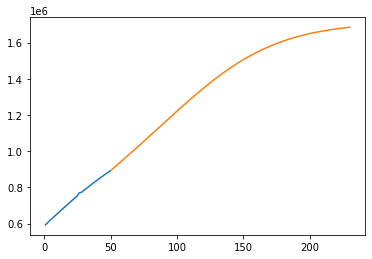

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[142:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

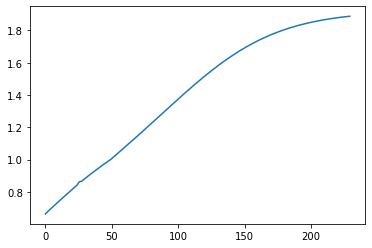

In [90]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[142:])

In [93]:
df3=scaler.inverse_transform(df3).tolist()

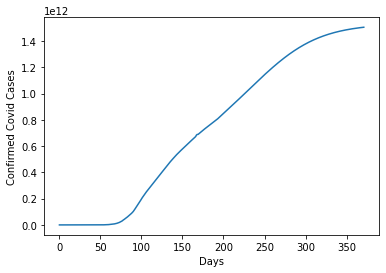

In [94]:
plt.plot(df3)
plt.ylabel("Confirmed Covid Cases")
plt.xlabel("Days")
plt.savefig("graph.png", dpi=1000)
